# Author Chiranjeev Sehgal

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("StudentsPerformance.csv")

In [3]:
data.shape

(1000, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
data_copy = data.copy()

In [7]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [8]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
data['total marks'] = data['math score']+data['reading score']+data['writing score']

In [11]:
data.sort_values(by='total marks', axis=0, ascending=False, inplace=True)

In [12]:
data.reset_index(inplace=True)

In [13]:
data.head()

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total marks
0,916,male,group E,bachelor's degree,standard,completed,100,100,100,300
1,458,female,group E,bachelor's degree,standard,none,100,100,100,300
2,962,female,group E,associate's degree,standard,none,100,100,100,300
3,114,female,group E,bachelor's degree,standard,completed,99,100,100,299
4,179,female,group D,some high school,standard,completed,97,100,100,297


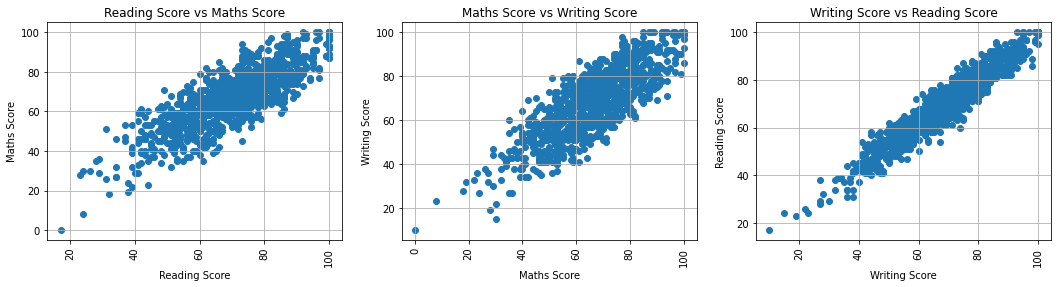

In [14]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.scatter(data['reading score'], data['math score'])
plt.title("Reading Score vs Maths Score")
plt.xlabel("Reading Score")  
plt.ylabel("Maths Score")
plt.xticks(rotation=90)
plt.grid()

plt.subplot(1,3,2)
plt.scatter(data['math score'], data['writing score'])
plt.title("Maths Score vs Writing Score")
plt.xlabel("Maths Score")
plt.xticks(rotation=90)
plt.ylabel("Writing Score")  
plt.grid()

plt.subplot(1,3,3)
plt.scatter(data['writing score'], data['reading score'])
plt.title("Writing Score vs Reading Score")
plt.xlabel("Writing Score")
plt.xticks(rotation=90)
plt.ylabel("Reading Score")  
plt.grid()
plt.show()

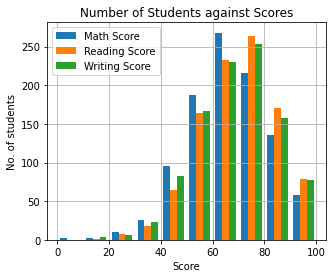

In [15]:
plt.figure(figsize=(5,4))
plt.hist([data['math score'],data['reading score'],data['writing score']])
plt.title('Number of Students against Scores')
plt.xlabel("Score")
plt.ylabel("No. of students")
plt.legend(['Math Score', 'Reading Score', 'Writing Score'])
plt.grid()
plt.show()

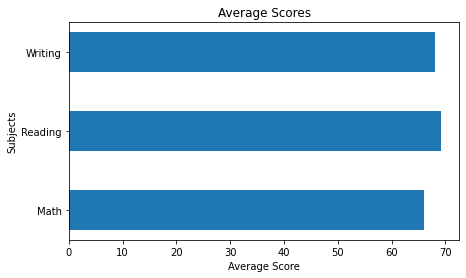

In [16]:
plt.figure(figsize=(7,4))
y=['Math','Reading','Writing']
width = [data['math score'].mean(),data['reading score'].mean(),data['writing score'].mean()]
plt.barh(y=y, width=width, height=0.5)
plt.title('Average Scores')
plt.xlabel("Average Score")
plt.ylabel("Subjects")
plt.show()

In [17]:
df_gender=data.groupby('gender')

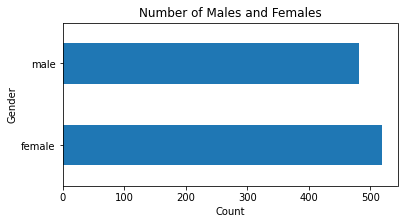

In [18]:
plt.figure(figsize=(6,3))
pd.value_counts(data['gender']).plot.barh()
plt.title("Number of Males and Females")
plt.xlabel("Count")
plt.ylabel("Gender")
plt.show()

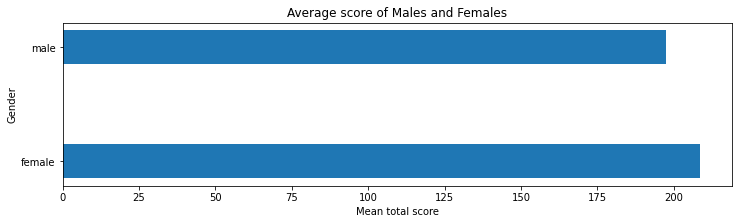

In [19]:
plt.figure(figsize = (12,3))
x = df_gender['total marks'].mean().keys()
y = df_gender['total marks'].mean()
plt.barh(x, y, height=0.3)
plt.title('Average score of Males and Females')
plt.xlabel("Mean total score")
plt.ylabel("Gender")
plt.show()

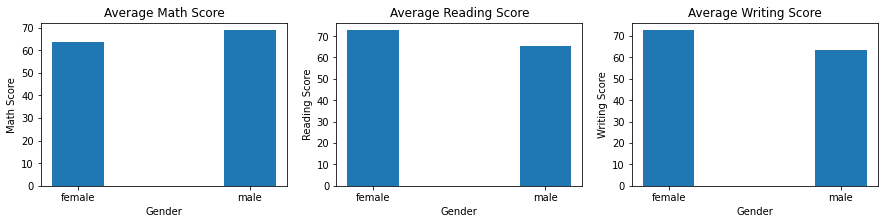

In [20]:
plt.figure(figsize = (15,3))
x = df_gender['total marks'].mean().keys()
plt.subplot(1,3,1)
y=df_gender['math score'].mean()
plt.title('Average Math Score')
plt.xlabel("Gender")
plt.ylabel("Math Score")
plt.bar(x, y, width=0.3)

plt.subplot(1,3,2)
y=df_gender['reading score'].mean()
plt.title('Average Reading Score')
plt.xlabel("Gender")
plt.ylabel("Reading Score")
plt.bar(x, y, width=0.3)

plt.subplot(1,3,3)
y=df_gender['writing score'].mean()
plt.title('Average Writing Score')
plt.xlabel("Gender")
plt.ylabel("Writing Score")
plt.bar(x, y, width=0.3)
plt.show()

In [21]:
df_testprep = data.groupby('test preparation course')

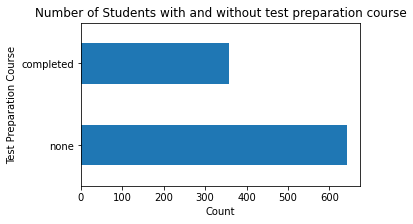

In [22]:
plt.figure(figsize = (5,3))
pd.value_counts(data['test preparation course']).plot.barh()
plt.title("Number of Students with and without test preparation course")
plt.xlabel("Count")
plt.ylabel("Test Preparation Course")
plt.show()

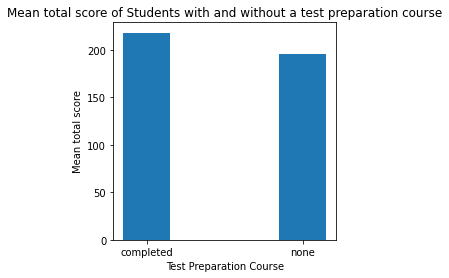

In [23]:
plt.figure(figsize=(4,4))
x = df_testprep['total marks'].mean().keys()
y = df_testprep['total marks'].mean()
plt.bar(x,y, width=0.3)
plt.title('Mean total score of Students with and without a test preparation course')
plt.xlabel("Test Preparation Course")
plt.ylabel("Mean total score")
plt.show()

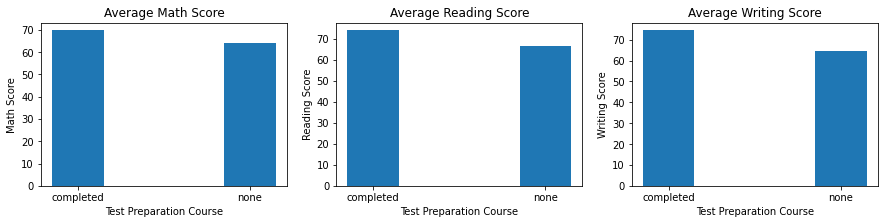

In [24]:
plt.figure(figsize = (15,3))
x = df_testprep['total marks'].mean().keys()
plt.subplot(1,3,1)
y=df_testprep['math score'].mean()
plt.title('Average Math Score')
plt.xlabel("Test Preparation Course")
plt.ylabel("Math Score")
plt.bar(x, y, width=0.3)

plt.subplot(1,3,2)
y=df_testprep['reading score'].mean()
plt.title('Average Reading Score')
plt.xlabel("Test Preparation Course")
plt.ylabel("Reading Score")
plt.bar(x,y, width=0.3)

plt.subplot(1,3,3)
y=df_testprep['writing score'].mean()
plt.title('Average Writing Score')
plt.xlabel("Test Preparation Course")
plt.ylabel("Writing Score")
plt.bar(x, y, width=0.3)
plt.show()

In [25]:
df_race = data.groupby('race/ethnicity')

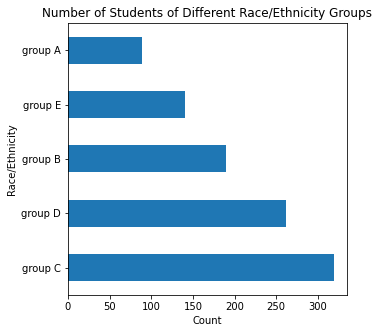

In [26]:
plt.figure(figsize = (5,5))
pd.value_counts(data['race/ethnicity']).plot.barh()
plt.title('Number of Students of Different Race/Ethnicity Groups')
plt.xlabel("Count")
plt.ylabel("Race/Ethnicity")
plt.show()

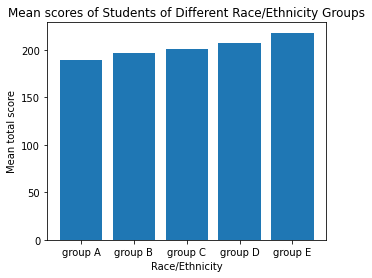

In [27]:
plt.figure(figsize = (5,4))
x = df_race['total marks'].mean().keys()
y = df_race['total marks'].mean()
plt.bar(x,y)
plt.title('Mean scores of Students of Different Race/Ethnicity Groups')
plt.xlabel("Race/Ethnicity")
plt.ylabel("Mean total score")
plt.show()

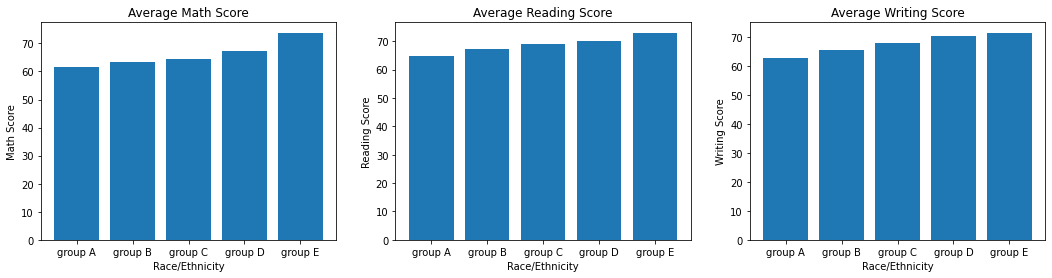

In [28]:
plt.figure(figsize=(18,4))
x = df_race['total marks'].mean().keys()

plt.subplot(1,3,1)
y = df_race['math score'].mean()
plt.bar(x,y)
plt.title('Average Math Score')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Math Score')

plt.subplot(1,3,2)
y = df_race['reading score'].mean()
plt.bar(x,y)
plt.title('Average Reading Score')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Reading Score')

plt.subplot(1,3,3)
y = df_race['writing score'].mean()
plt.bar(x,y)
plt.title('Average Writing Score')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Writing Score')
plt.show()

In [29]:
df_lunch = data.groupby('lunch')

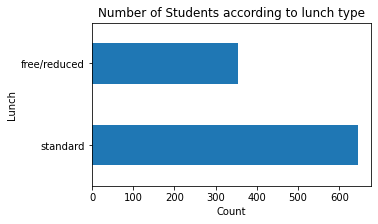

In [30]:
plt.figure(figsize = (5,3))
pd.value_counts(data['lunch']).plot.barh()
plt.title('Number of Students according to lunch type')
plt.xlabel("Count")
plt.ylabel("Lunch")
plt.show()

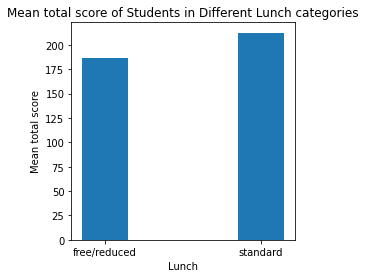

In [31]:
plt.figure(figsize=(4,4))
x = df_lunch['total marks'].mean().keys()
y = df_lunch['total marks'].mean()
plt.bar(x,y, width=0.3)
plt.title('Mean total score of Students in Different Lunch categories')
plt.xlabel("Lunch")
plt.ylabel("Mean total score")
plt.show()

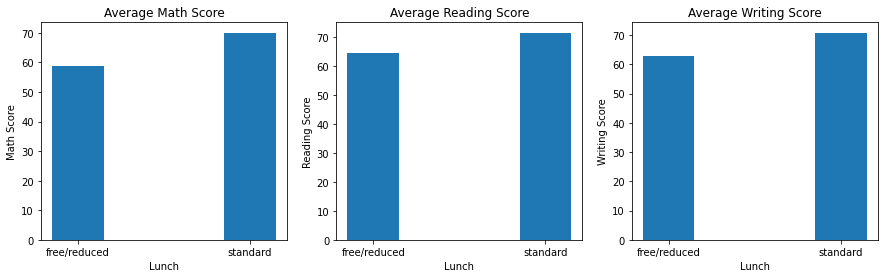

In [32]:
plt.figure(figsize=(15,4))
x= df_lunch['total marks'].mean().keys()

plt.subplot(1,3,1)
y=df_lunch['math score'].mean()
plt.bar(x,y, width=0.3)
plt.title('Average Math Score')
plt.xlabel("Lunch")
plt.ylabel("Math Score")

plt.subplot(1,3,2)
y=df_lunch['reading score'].mean()
plt.bar(x,y, width=0.3)
plt.title('Average Reading Score')
plt.xlabel("Lunch")
plt.ylabel("Reading Score")

plt.subplot(1,3,3)
y=df_lunch['writing score'].mean()
plt.bar(x,y, width=0.3)
plt.title('Average Writing Score')
plt.xlabel("Lunch")
plt.ylabel("Writing Score")
plt.show()

In [33]:
df_parentaledu = data.groupby('parental level of education')

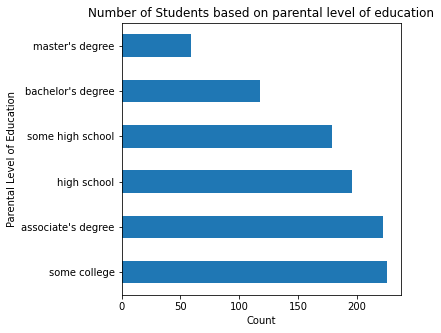

In [34]:
plt.figure(figsize = (5,5))
pd.value_counts(data['parental level of education']).plot.barh()
plt.title('Number of Students based on parental level of education')
plt.xlabel("Count")
plt.ylabel("Parental Level of Education")
plt.show()

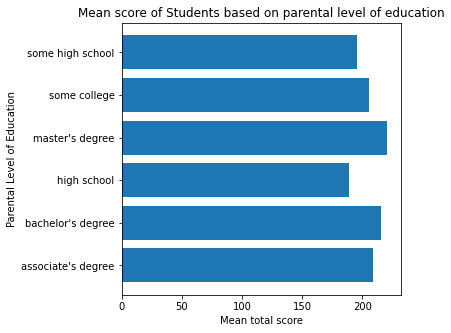

In [35]:
plt.figure(figsize = (5,5))
x= df_parentaledu['total marks'].mean().keys()
y = df_parentaledu['total marks'].mean()
plt.barh(x,y)
plt.title('Mean score of Students based on parental level of education')
plt.xlabel("Mean total score")
plt.ylabel("Parental Level of Education")
plt.show()

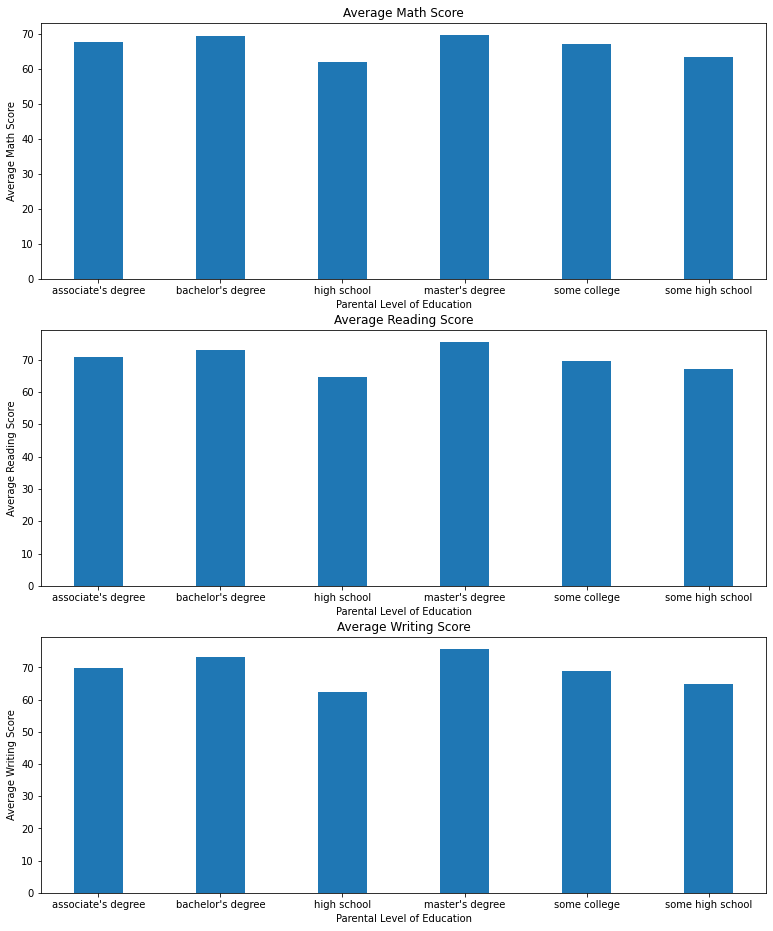

In [36]:
plt.figure(figsize=(13,16))
x=df_parentaledu['total marks'].mean().keys()

plt.subplot(3,1,1)
y=df_parentaledu['math score'].mean()
plt.bar(x,y, width=0.4)
plt.title('Average Math Score')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Math Score')

plt.subplot(3,1,2)
y=df_parentaledu['reading score'].mean()
plt.bar(x,y, width=0.4)
plt.title('Average Reading Score')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Reading Score')

plt.subplot(3,1,3)
y=df_parentaledu['writing score'].mean()
plt.bar(x,y, width=0.4)
plt.title('Average Writing Score')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Writing Score')
plt.show()